## Keras: A high level neural network library

In this exercise we will revisit classification using simple neural networks. To do so we will use Keras, a popular neural network package. Keras is a high level library that allows rapid prototyping of neural networks due to its precompiled layers, just as Scikit-learn contains a number of prebuilt classifiers.


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

Neural networks are so popular now due to their ability to quickly learn nonlinear boundaries. So, we have an example that would be impossible for a linear classifier and demonstrate how a neural network can be used to solve this. In the dataset below there is no straight line that can be drawn which perfectly separates the red and blue classes

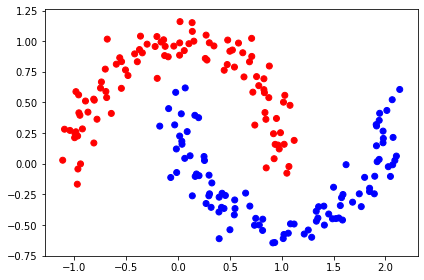

In [85]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import lenses_dataset, get_colors


X, y = lenses_dataset()

# For consistent color plotting:

cmap=get_colors(y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.tight_layout()
plt.show()

In [86]:
#checking dimensions of the dataset
print(X.shape)
print(y.shape)

(200, 2)
(200,)


Let's split it into a training and testing set

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

We will build a Perceptron using Keras as an example. A perceptron is a 0 hidden layer neural network with a single output unit. In Keras terms, it's a single Dense layer with 1 unit. We will build this perceptron with a sigmoidal output (so it outputs a probability of class 1) and the binary_crossentropy loss function (which corresponds to sigmoid).

In [88]:
# Relevant imports
from tensorflow.keras.models import Sequential
# Keras refers to an architecture in which the outputs of 
# one layer are the inputs to the next as "Sequential"
from tensorflow.keras.layers import Dense
# Keras as a "dense" connection between layers, where every input 
# unit connects to a unit in the next layer
from tensorflow.keras.optimizers import SGD
# SGD is the learning algorithm we will use

In [102]:
#Let's first create neural network with 1 layer 
perceptron = Sequential()
perceptron.add(Dense(1, input_dim = 2))

Now we specify how to optimize the neural network

In [103]:
#Let's use stochastic gradient descent
sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
perceptron.compile(loss="binary_crossentropy", optimizer=sgd)


In [104]:
#Now we train the built perceptron
perceptron.fit(X, y, epochs=20, batch_size=10)

Train on 200 samples
Epoch 1/20
200/200 [==============================] - 0s 2ms/sample - loss: 1.2459
Epoch 2/20
200/200 [==============================] - 0s 146us/sample - loss: 1.2223
Epoch 3/20
200/200 [==============================] - 0s 111us/sample - loss: 1.2045
Epoch 4/20
200/200 [==============================] - 0s 128us/sample - loss: 1.1915
Epoch 5/20
200/200 [==============================] - 0s 102us/sample - loss: 1.0126
Epoch 6/20
200/200 [==============================] - 0s 109us/sample - loss: 0.8009
Epoch 7/20
200/200 [==============================] - 0s 120us/sample - loss: 1.8260
Epoch 8/20
200/200 [==============================] - 0s 116us/sample - loss: 1.0793
Epoch 9/20
200/200 [==============================] - 0s 133us/sample - loss: 0.6959
Epoch 10/20
200/200 [==============================] - 0s 123us/sample - loss: 0.4897
Epoch 11/20
200/200 [==============================] - 0s 111us/sample - loss: 0.4073
Epoch 12/20
200/200 [=======================

In [105]:
from utils import get_accuracy
get_accuracy(perceptron, X_test, y_test)

Text(12.375, 0.5, 'Test')

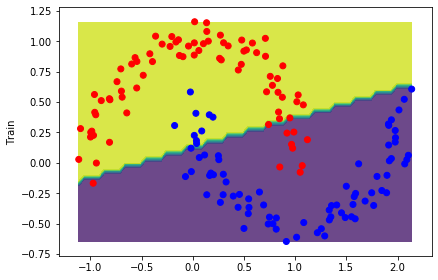

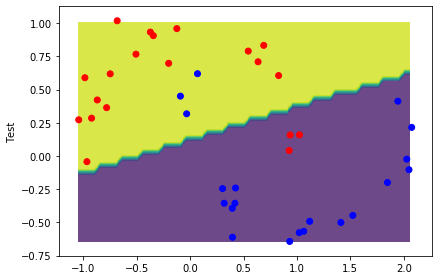

In [107]:
from utils import visualize_2d_classification
f, ax = visualize_2d_classification(perceptron, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(perceptron, X_test, y_test)
ax.set_ylabel("Test")

A perceptron is nothing more than a linear classifier, which is trying to separate our data using a line. It turns out that the introduction of hidden layers allows us to draw "lines" in higher dimensions, which, when mapped back into our original 2d space,  may look nonlinear.

In [12]:
from exercise import build_one_output_model
model = build_one_output_model()

In [13]:
model.fit(X_train, y_train, epochs=1000, batch_size=10, verbose=0)
get_accuracy(model, X_test, y_test)

0.875

Text(18.75, 0.5, 'Test')

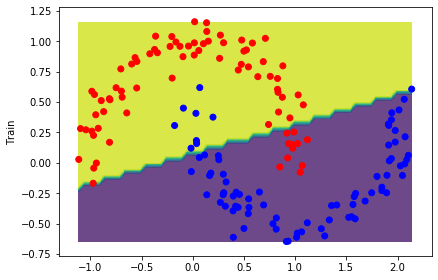

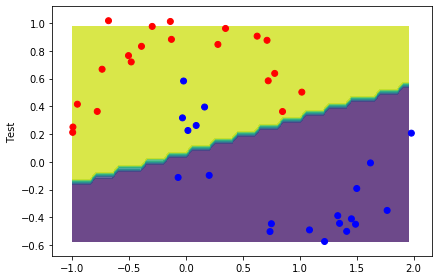

In [14]:
# And visualize how your model did
f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")


It is actually quite rare for a neural network to have a single output unit as we've implemented above. Usually we have a $k$ unit output layer, where $k$ is your number of outputs. This is typically done because when combined with the "softmax" activation function , the activity of each unit corresponds with the probability of that class. This allows us to easily extend to multiclass classification.

Now we will still work with two units, but map them to two output units rather than 1. class 0 will be [1, 0], and class 1 will be [0, 1]. This operation is referred to as "one hot encoding". It is easy to convert between labels (i.e. [1,2,3]) to their one-hot encoded counterparts:

In [15]:
# Before we can fit the network, we have to one-hot vectorize our response.
# Fortunately, there is a keras method for that.
from tensorflow.keras.utils import to_categorical
y_train_vectorized = to_categorical(y_train)

In [16]:
print("Label | One-hot")
for i in range(10):
    print("{} | {}".format(y_train[i], y_train_vectorized[i]))

Label | One-hot
0 | [1. 0.]
0 | [1. 0.]
1 | [0. 1.]
1 | [0. 1.]
1 | [0. 1.]
0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]
1 | [0. 1.]
0 | [1. 0.]


The one hot encoded vectors will serve as future labels for our models. 

We will now implement build_classification_model() in exercise.py that returns a sequential model that takes an input of size 2, passes it to a hidden layer of size 10, then a hidden layer of size 5, then a readout layer of size 2. 

As before, we use the "relu" activation function for hidden layers, but since we have multiple output units, the "softmax" activation for the final layer is used.

In [17]:
from exercise import build_classification_model

In [18]:
model = build_classification_model()

Testing the implementation

In [19]:
model.fit(X_train, y_train_vectorized, epochs=1000, batch_size=10, verbose = 1)

Train on 160 samples
Epoch 1/1000
160/160 [==============================] - 0s 2ms/sample - loss: 0.6512 - accuracy: 0.5500
Epoch 2/1000
160/160 [==============================] - 0s 108us/sample - loss: 0.6120 - accuracy: 0.6687
Epoch 3/1000
160/160 [==============================] - 0s 145us/sample - loss: 0.5785 - accuracy: 0.7188
Epoch 4/1000
160/160 [==============================] - 0s 150us/sample - loss: 0.5542 - accuracy: 0.8000
Epoch 5/1000
160/160 [==============================] - 0s 166us/sample - loss: 0.5343 - accuracy: 0.8313
Epoch 6/1000
160/160 [==============================] - 0s 192us/sample - loss: 0.5163 - accuracy: 0.8188
Epoch 7/1000
160/160 [==============================] - 0s 189us/sample - loss: 0.4994 - accuracy: 0.8188
Epoch 8/1000
160/160 [==============================] - 0s 178us/sample - loss: 0.4853 - accuracy: 0.8250
Epoch 9/1000
160/160 [==============================] - 0s 183us/sample - loss: 0.4719 - accuracy: 0.8250
Epoch 10/1000
160/160 [====

160/160 [==============================] - 0s 179us/sample - loss: 0.2384 - accuracy: 0.8813
Epoch 154/1000
160/160 [==============================] - 0s 165us/sample - loss: 0.2379 - accuracy: 0.8813
Epoch 155/1000
160/160 [==============================] - 0s 164us/sample - loss: 0.2378 - accuracy: 0.8813
Epoch 156/1000
160/160 [==============================] - 0s 142us/sample - loss: 0.2377 - accuracy: 0.8813
Epoch 157/1000
160/160 [==============================] - 0s 151us/sample - loss: 0.2362 - accuracy: 0.8813
Epoch 158/1000
160/160 [==============================] - 0s 187us/sample - loss: 0.2364 - accuracy: 0.8875
Epoch 159/1000
160/160 [==============================] - 0s 178us/sample - loss: 0.2359 - accuracy: 0.8875
Epoch 160/1000
160/160 [==============================] - 0s 172us/sample - loss: 0.2358 - accuracy: 0.8750
Epoch 161/1000
160/160 [==============================] - 0s 130us/sample - loss: 0.2348 - accuracy: 0.8813
Epoch 162/1000
160/160 [===================

Epoch 229/1000
160/160 [==============================] - 0s 193us/sample - loss: 0.1795 - accuracy: 0.9125
Epoch 230/1000
160/160 [==============================] - 0s 191us/sample - loss: 0.1786 - accuracy: 0.9187
Epoch 231/1000
160/160 [==============================] - 0s 229us/sample - loss: 0.1760 - accuracy: 0.9187
Epoch 232/1000
160/160 [==============================] - 0s 199us/sample - loss: 0.1763 - accuracy: 0.9187
Epoch 233/1000
160/160 [==============================] - 0s 158us/sample - loss: 0.1739 - accuracy: 0.9187
Epoch 234/1000
160/160 [==============================] - 0s 163us/sample - loss: 0.1731 - accuracy: 0.9187
Epoch 235/1000
160/160 [==============================] - 0s 202us/sample - loss: 0.1718 - accuracy: 0.9187
Epoch 236/1000
160/160 [==============================] - 0s 202us/sample - loss: 0.1709 - accuracy: 0.9250
Epoch 237/1000
160/160 [==============================] - 0s 187us/sample - loss: 0.1704 - accuracy: 0.9312
Epoch 238/1000
160/160 [====

Epoch 380/1000
160/160 [==============================] - 0s 353us/sample - loss: 0.0483 - accuracy: 0.9937
Epoch 381/1000
160/160 [==============================] - 0s 337us/sample - loss: 0.0479 - accuracy: 0.9937
Epoch 382/1000
160/160 [==============================] - 0s 339us/sample - loss: 0.0476 - accuracy: 0.9937
Epoch 383/1000
160/160 [==============================] - 0s 332us/sample - loss: 0.0474 - accuracy: 0.9937
Epoch 384/1000
160/160 [==============================] - 0s 315us/sample - loss: 0.0471 - accuracy: 0.9937
Epoch 385/1000
160/160 [==============================] - 0s 317us/sample - loss: 0.0466 - accuracy: 0.9937
Epoch 386/1000
160/160 [==============================] - 0s 368us/sample - loss: 0.0467 - accuracy: 0.9937
Epoch 387/1000
160/160 [==============================] - 0s 320us/sample - loss: 0.0459 - accuracy: 0.9937
Epoch 388/1000
160/160 [==============================] - 0s 327us/sample - loss: 0.0457 - accuracy: 0.9937
Epoch 389/1000
160/160 [====

Epoch 531/1000
160/160 [==============================] - 0s 215us/sample - loss: 0.0197 - accuracy: 1.0000
Epoch 532/1000
160/160 [==============================] - 0s 213us/sample - loss: 0.0195 - accuracy: 1.0000
Epoch 533/1000
160/160 [==============================] - 0s 203us/sample - loss: 0.0194 - accuracy: 1.0000
Epoch 534/1000
160/160 [==============================] - 0s 177us/sample - loss: 0.0194 - accuracy: 1.0000
Epoch 535/1000
160/160 [==============================] - 0s 198us/sample - loss: 0.0192 - accuracy: 1.0000
Epoch 536/1000
160/160 [==============================] - 0s 198us/sample - loss: 0.0191 - accuracy: 1.0000
Epoch 537/1000
160/160 [==============================] - 0s 197us/sample - loss: 0.0191 - accuracy: 1.0000
Epoch 538/1000
160/160 [==============================] - 0s 207us/sample - loss: 0.0191 - accuracy: 1.0000
Epoch 539/1000
160/160 [==============================] - 0s 226us/sample - loss: 0.0189 - accuracy: 1.0000
Epoch 540/1000
160/160 [====

Epoch 682/1000
160/160 [==============================] - 0s 345us/sample - loss: 0.0113 - accuracy: 1.0000
Epoch 683/1000
160/160 [==============================] - 0s 227us/sample - loss: 0.0113 - accuracy: 1.0000
Epoch 684/1000
160/160 [==============================] - 0s 190us/sample - loss: 0.0112 - accuracy: 1.0000
Epoch 685/1000
160/160 [==============================] - 0s 202us/sample - loss: 0.0113 - accuracy: 1.0000
Epoch 686/1000
160/160 [==============================] - 0s 189us/sample - loss: 0.0111 - accuracy: 1.0000
Epoch 687/1000
160/160 [==============================] - 0s 188us/sample - loss: 0.0111 - accuracy: 1.0000
Epoch 688/1000
160/160 [==============================] - 0s 205us/sample - loss: 0.0111 - accuracy: 1.0000
Epoch 689/1000
160/160 [==============================] - 0s 347us/sample - loss: 0.0110 - accuracy: 1.0000
Epoch 690/1000
160/160 [==============================] - 0s 346us/sample - loss: 0.0110 - accuracy: 1.0000
Epoch 691/1000
160/160 [====

Epoch 833/1000
160/160 [==============================] - 0s 318us/sample - loss: 0.0076 - accuracy: 1.0000
Epoch 834/1000
160/160 [==============================] - 0s 312us/sample - loss: 0.0076 - accuracy: 1.0000
Epoch 835/1000
160/160 [==============================] - 0s 303us/sample - loss: 0.0076 - accuracy: 1.0000
Epoch 836/1000
160/160 [==============================] - 0s 329us/sample - loss: 0.0076 - accuracy: 1.0000
Epoch 837/1000
160/160 [==============================] - 0s 325us/sample - loss: 0.0076 - accuracy: 1.0000
Epoch 838/1000
160/160 [==============================] - 0s 343us/sample - loss: 0.0075 - accuracy: 1.0000
Epoch 839/1000
160/160 [==============================] - 0s 330us/sample - loss: 0.0075 - accuracy: 1.0000
Epoch 840/1000
160/160 [==============================] - 0s 339us/sample - loss: 0.0075 - accuracy: 1.0000
Epoch 841/1000
160/160 [==============================] - 0s 329us/sample - loss: 0.0075 - accuracy: 1.0000
Epoch 842/1000
160/160 [====

Epoch 984/1000
160/160 [==============================] - 0s 162us/sample - loss: 0.0057 - accuracy: 1.0000
Epoch 985/1000
160/160 [==============================] - 0s 174us/sample - loss: 0.0057 - accuracy: 1.0000
Epoch 986/1000
160/160 [==============================] - 0s 150us/sample - loss: 0.0057 - accuracy: 1.0000
Epoch 987/1000
160/160 [==============================] - 0s 175us/sample - loss: 0.0057 - accuracy: 1.0000
Epoch 988/1000
160/160 [==============================] - 0s 173us/sample - loss: 0.0056 - accuracy: 1.0000
Epoch 989/1000
160/160 [==============================] - 0s 175us/sample - loss: 0.0056 - accuracy: 1.0000
Epoch 990/1000
160/160 [==============================] - 0s 165us/sample - loss: 0.0056 - accuracy: 1.0000
Epoch 991/1000
160/160 [==============================] - 0s 140us/sample - loss: 0.0056 - accuracy: 1.0000
Epoch 992/1000
160/160 [==============================] - 0s 147us/sample - loss: 0.0057 - accuracy: 1.0000
Epoch 993/1000
160/160 [====

In [20]:
get_accuracy(model, X_test, y_test)

1.0

Text(18.75, 0.5, 'Test')

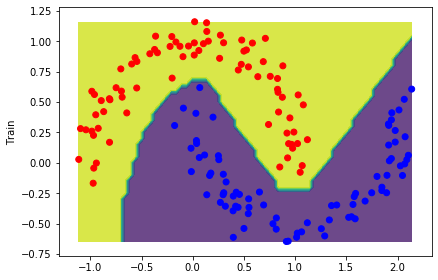

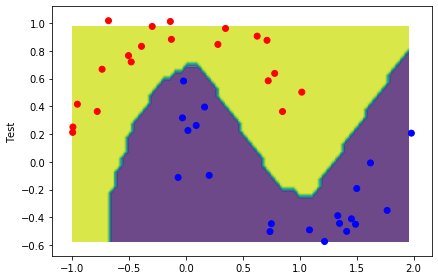

In [21]:
# And visualize how your model did
f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")

We will now build a neural network to predict the output in the banking marketing dataset. features_ex2.xlsx contains the features. It has 4521 records. First 3165 observations are used for training dataset, next 678 observations are used for cross validation dataset and final 678 observations are used for test dataset.

label_ex2.xlsx contains the label: "yes" or "no". First 3165 observations are used for training dataset, next 678 observations are used for cross validation dataset.

In [22]:
from exercise import build_final_model
from tensorflow.keras.utils import to_categorical

In [23]:
#Read the data
#Convert categorical variables into one-hot encodings(including the output variable consisting of "yes" or "no")
#Split data into train, validation and test set (70:15:15 ratio)
#Apply standardization to continuous values

X = pd.read_excel("features_ex2.xlsx")
y = pd.read_excel("label_ex2.xlsx")

categories = ['job','marital','education','default','housing','loan','contact','month','poutcome']
categorical = pd.get_dummies(X[categories])
continuous = X.drop(columns=categories)
X = pd.concat([continuous,categorical],axis=1)

#One hot encoding y
y = pd.get_dummies(y)

In [24]:
#splitting data into train, cv and test set (70:15:15 ratio)
#Training dataset
X_train = X.iloc[0:3165,:]
y_train = y[0:3165]

#Cross validation dataset
X_cv = X.iloc[3165:3843,:]
y_cv = y.iloc[3165:3843,1]

#Test dataset
X_test = X.iloc[3843:4521,:]

X_cv = X_cv.reset_index()
del X_cv['index']

X_test = X_test.reset_index()
del X_test['index']

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

continuous_variables = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']

X_train[continuous_variables] = pd.DataFrame(scaler.fit_transform(X_train[continuous_variables]), columns = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous'])
X_cv[continuous_variables] = pd.DataFrame(scaler.transform(X_cv[continuous_variables]))
X_test[continuous_variables] = pd.DataFrame(scaler.transform(X_test[continuous_variables]))

C:\Users\Taufeeq\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [26]:
model_nn = build_final_model()

In [27]:
#fit the model
#obtain predictions on validation set and compute accuracy,precision,recall and plot ROC curve with AOC
model_nn.fit(X_train, y_train, epochs=200, batch_size=10, verbose = 1)


Train on 3165 samples
Epoch 1/200
3165/3165 [==============================] - 1s 352us/sample - loss: 0.3989 - accuracy: 0.8803
Epoch 2/200
3165/3165 [==============================] - 2s 480us/sample - loss: 0.3589 - accuracy: 0.8844
Epoch 3/200
3165/3165 [==============================] - 2s 515us/sample - loss: 0.3535 - accuracy: 0.8844
Epoch 4/200
3165/3165 [==============================] - 1s 352us/sample - loss: 0.3513 - accuracy: 0.8844
Epoch 5/200
3165/3165 [==============================] - 1s 226us/sample - loss: 0.3495 - accuracy: 0.8844
Epoch 6/200
3165/3165 [==============================] - 1s 232us/sample - loss: 0.3454 - accuracy: 0.8844
Epoch 7/200
3165/3165 [==============================] - 1s 243us/sample - loss: 0.3452 - accuracy: 0.8844
Epoch 8/200
3165/3165 [==============================] - 1s 273us/sample - loss: 0.3392 - accuracy: 0.8844
Epoch 9/200
3165/3165 [==============================] - 1s 209us/sample - loss: 0.3429 - accuracy: 0.8844
Epoch 10/200
31

3165/3165 [==============================] - 1s 353us/sample - loss: 0.2229 - accuracy: 0.9166
Epoch 151/200
3165/3165 [==============================] - 1s 373us/sample - loss: 0.2248 - accuracy: 0.9156
Epoch 152/200
3165/3165 [==============================] - 1s 253us/sample - loss: 0.2194 - accuracy: 0.9251
Epoch 153/200
3165/3165 [==============================] - 2s 492us/sample - loss: 0.2226 - accuracy: 0.9163
Epoch 154/200
3165/3165 [==============================] - 2s 478us/sample - loss: 0.2196 - accuracy: 0.9191
Epoch 155/200
3165/3165 [==============================] - 1s 328us/sample - loss: 0.2160 - accuracy: 0.9210
Epoch 156/200
3165/3165 [==============================] - 1s 402us/sample - loss: 0.2115 - accuracy: 0.9185
Epoch 157/200
3165/3165 [==============================] - 1s 456us/sample - loss: 0.2157 - accuracy: 0.9150
Epoch 158/200
3165/3165 [==============================] - 1s 445us/sample - loss: 0.2087 - accuracy: 0.9235
Epoch 159/200
3165/3165 [========

In [67]:
predictions_cv_nn = model_nn.predict_classes(X_cv)

In [81]:
predictions_cv_nn_test = model_nn.predict_classes(X_test)
pd.DataFrame(predictions_cv_nn_test).to_csv('result_nn.csv', index = False)

In [68]:
#obtain predictions on validation set and compute accuracy,precision and recall
from sklearn.metrics import accuracy_score,precision_score, recall_score
print("Test accuracy is:", accuracy_score(y_cv, predictions_cv_nn))
print("Test precision is:", precision_score(y_cv, predictions_cv_nn))
print("Test recall is:", recall_score(y_cv, predictions_cv_nn))

Test accuracy is: 0.8952802359882006
Test precision is: 0.6
Test recall is: 0.041666666666666664


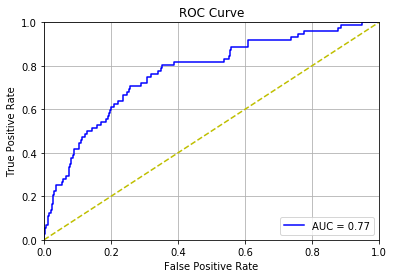

In [69]:
#plot ROC curve with AOC
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# calculate the fpr and tpr for all thresholds of the classification
from sklearn.metrics import roc_curve
y_pred_nn = model_nn.predict(X_cv)[:,1]

fpr_nn, tpr_nn, thresholds_keras = roc_curve(y_cv, y_pred_nn)

#Calculating AUC
from sklearn.metrics import auc
auc_nn = auc(fpr_nn, tpr_nn)

import matplotlib.pyplot as plt
# Plot the ROC curve by giving appropriate names for title and axes. 
plt.title('ROC Curve')
plt.plot(fpr_nn, tpr_nn, 'b', label = 'AUC = %0.2f' % auc_nn)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0, 1], [0, 1], 'y--')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Lets check how would logistic and randomforest model perform in this scenario. Later we choose the best model for this problem.

In [2]:
from exercise import logistic_regression_model

In [34]:
model_lr = logistic_regression_model()

In [35]:
#fit the model
#obtain predictions on validation set and compute accuracy,precision,recall and plot ROC curve with AOC

model_lr.fit(X_train, y_train.iloc[:,1])

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
predictions_cv_lr = model_lr.predict(X_cv)

In [38]:
#obtain predictions on validation set and compute accuracy,precision and recall
print("Test accuracy is:", accuracy_score(y_cv, predictions_cv_lr))
print("Test precision is:", precision_score(y_cv, predictions_cv_lr))
print("Test recall is:", recall_score(y_cv, predictions_cv_lr))

Test accuracy is: 0.8982300884955752
Test precision is: 0.6
Test recall is: 0.125


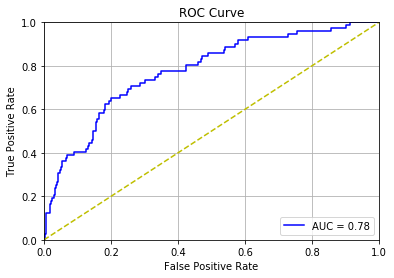

In [39]:
#plot ROC curve with AOC
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# calculate the fpr and tpr for all thresholds of the classification
from sklearn.metrics import roc_curve
y_pred_lr = model_lr.predict_proba(X_cv)[:,1]

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_cv, y_pred_lr)

#Calculating AUC
from sklearn.metrics import auc
auc_lr = auc(fpr_lr, tpr_lr)

import matplotlib.pyplot as plt
# Plot the ROC curve by giving appropriate names for title and axes. 
plt.title('ROC Curve')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % auc_lr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0, 1], [0, 1], 'y--')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [72]:
from exercise import random_forest_model

In [73]:
model_rf = random_forest_model()

In [74]:
#fit the model
#obtain predictions on validation set and compute accuracy,precision,recall and plot ROC curve with AOC
model_rf.fit(X_train, y_train.iloc[:,1])

C:\Users\Taufeeq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=26, verbose=0,
                       warm_start=False)

In [75]:
predictions_cv_rf = model_rf.predict(X_cv)

In [76]:
#obtain predictions on validation set and compute accuracy,precision and recall
print("Test accuracy is:", accuracy_score(y_cv, predictions_cv_rf))
print("Test precision is:", precision_score(y_cv, predictions_cv_rf))
print("Test recall is:", recall_score(y_cv, predictions_cv_rf))

Test accuracy is: 0.8938053097345132
Test precision is: 0.5
Test recall is: 0.16666666666666666


In [77]:
model_rf.predict_proba(X_cv)

array([[0.9, 0.1],
       [1. , 0. ],
       [0.9, 0.1],
       ...,
       [0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ]])

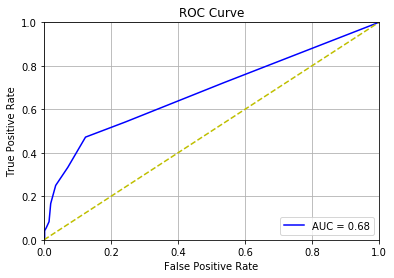

In [78]:
#plot ROC curve with AOC
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

y_cv_transformed = le.fit_transform(y_cv)
#predictions_cv_transformed = le.fit_transform(predictions_cv)

# calculate the fpr and tpr for all thresholds of the classification
from sklearn.metrics import roc_curve
y_pred_rf = model_rf.predict_proba(X_cv)[:,1]

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_cv_transformed, y_pred_rf)

#Calculating AUC
from sklearn.metrics import auc
auc_rf = auc(fpr_rf, tpr_rf)

import matplotlib.pyplot as plt
# Plot the ROC curve by giving appropriate names for title and axes. 
plt.title('ROC Curve')
plt.plot(fpr_rf, tpr_rf, 'b', label = 'AUC = %0.2f' % auc_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0, 1], [0, 1], 'y--')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

The best predictions were obtained for neural networks. Though depending on the paratmeters chosen for neural network the accuracy on the validation set changed. I think the same applies to random forest as well. Although given the parameters we have chosen, neural networks performed better as the recall was better than both logistic regression and random forest. Accuracy and precision were similar for neural networks and logistic regression. In case of random forest, even though precision is slightly lower, recall is higher and giving us much lower AUC value of 0.68 compared to 0.77 and 0.78 in case of neural networks and logistic regression respectively. Hence we have chosen neural networks as the best prediction model.